In [4]:
import os
import random
import numpy as np
import keras
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from scipy.misc import imread
from scipy.misc import imresize
from keras.optimizers import SGD, Adam, Adamax
import tensorflow as tf

In [5]:
root_dir = os.path.abspath('.')
data_dir = ''

In [6]:
train = pd.read_csv(os.path.join(data_dir, 'train.csv'))
test = pd.read_csv(os.path.join(data_dir, 'test.csv'))

In [7]:
temp = []
for img_name in train.ID:
    img_path = os.path.join(data_dir, 'Train', img_name)
    img = imread(img_path)
    img = imresize(img, (64,64))
    img = img.astype('float32') # this will help us in later stage
    temp.append(img)

D:\anaconda\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.
D:\anaconda\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  """


In [8]:
train_x = np.stack(temp) 

In [9]:
temp = []
for img_name in test.ID:
    img_path = os.path.join(data_dir, 'Test', img_name)
    img = imread(img_path)
    img = imresize(img, (64,64))
    img = img.astype('float32') # this will help us in later stage
    temp.append(img)

D:\anaconda\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.
D:\anaconda\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  """


In [10]:
test_x = np.stack(temp) 

In [11]:
train_x = train_x / 255.
test_x = test_x / 255.
train.Class.value_counts(normalize=True)

MIDDLE    0.542751
YOUNG     0.336883
OLD       0.120366
Name: Class, dtype: float64

In [12]:
lb = LabelEncoder()
train_y = lb.fit_transform(train.Class)
train_y = keras.utils.np_utils.to_categorical(train_y)

In [13]:
epochs = 15
batch_size = 128

model = Sequential()
model.add(Convolution2D(32, (3, 3),  padding='valid',activation='relu', input_shape=(64,64,3)))

model.add(Convolution2D(16, (3, 3), padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Convolution2D(8, (3, 3), padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(3, activation='softmax'))




model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 16)        4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 30, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 8)        

In [14]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(train_x, train_y, batch_size=batch_size,epochs=epochs,verbose=1)

Epoch 1/15
19906/19906 [==============================] - 83s 4ms/step - loss: 0.9111 - accuracy: 0.5621
Epoch 2/15
19906/19906 [==============================] - 82s 4ms/step - loss: 0.8037 - accuracy: 0.6342
Epoch 3/15
19906/19906 [==============================] - 80s 4ms/step - loss: 0.7578 - accuracy: 0.6601
Epoch 4/15
19906/19906 [==============================] - 81s 4ms/step - loss: 0.7319 - accuracy: 0.6757
Epoch 5/15
19906/19906 [==============================] - 83s 4ms/step - loss: 0.7024 - accuracy: 0.6900
Epoch 6/15
19906/19906 [==============================] - 81s 4ms/step - loss: 0.6916 - accuracy: 0.7006
Epoch 7/15
19906/19906 [==============================] - 81s 4ms/step - loss: 0.6726 - accuracy: 0.7075
Epoch 8/15
19906/19906 [==============================] - 81s 4ms/step - loss: 0.6583 - accuracy: 0.7130
Epoch 9/15
19906/19906 [==============================] - 84s 4ms/step - loss: 0.6410 - accuracy: 0.7252
Epoch 10/15
19906/19906 [==============================

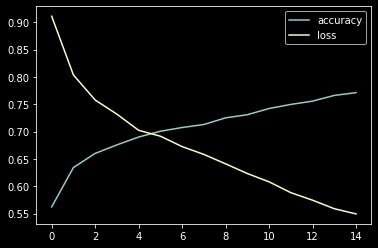

In [17]:
import matplotlib.pyplot as plt
plt.plot(model.history.history['accuracy'], label='accuracy')
plt.plot(model.history.history['loss'], label='loss')
plt.legend()
plt.show()
plt.style.use('dark_background')